In [1]:
using Revise
using ConvexHullPricing
using DataFrames
using Plots
using JLD2
using ProgressBars, JuMP, Gurobi

function mon(array)
  result = Float64[]
  last = array[1]
  for elt in array
    new_last = minimum([elt, last])
    push!(result, new_last)
    last = new_last
  end
  return result
end

const UT = ConvexHullPricing.Utilitaries
const OPT = ConvexHullPricing.Optimizer

instances = []
for file in readdir("..//data//belgian"; join=true)
  push!(instances, UT.load_data(file))
end

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-02
Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-02


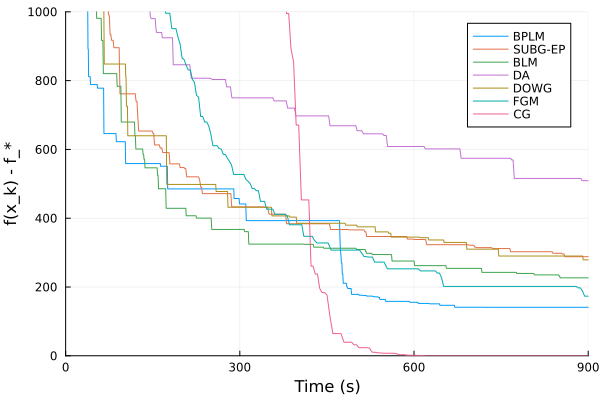

In [4]:
idx = 1
instance = instances[idx]
FS = maximum(load_object("..//results//optimal_values//NewRefinedOptRunBE$(idx).jld2")[3]) + 3.411934144794941
XBLM, ITBLM, BLM, TBLM = load_object("..//results//15min_runs//BundleLevelMethodBE$(idx).jld2")
XBPLM, ITBPLM, BPLM, TBPLM = load_object("..//results//15min_runs//BundleProximalLevelMethod-L-BE$(idx).jld2")
XPOL, ITPOL, POL, TPOL = load_object("..//results//15min_runs//PolyakMethodBE$(idx).jld2")
XSGEP, ITSGEP, SGEP, TSGEP = load_object("..//results//15min_runs//SubG-EP-BE$(idx).jld2")
XDWG, ITDWG, DWG, TDWG = load_object("..//results//15min_runs//DowGBE$(idx).jld2")
XDA, ITDA, DA, TDA = load_object("..//results//15min_runs//D-AdaptationBE$(idx).jld2")
XFGM, ITFGM, FGM, TFGM = load_object("..//results//15min_runs//FGMBE$(idx).jld2")
XCG, ITCG, CG, TCG = load_object("..//results//15min_runs//ColumnGeneration-BE$(idx).jld2")

plot(TBPLM[2:end], mon(FS .- (BPLM)), label="BPLM", xlims = (0, 900), ylims = (0, 1000))
plot!(TSGEP[2:end], mon(FS .- (SGEP)), label="SUBG-EP")
plot!(TBLM[2:end], mon(FS .- (BLM)), label="BLM")
plot!(TDA[2:end], mon(FS .- (DA)), label="DA")
plot!(TDWG[2:end], mon(FS .- (DWG)), label="DOWG")
plot!(TFGM[1:end], mon(FS .- (FGM)), label="FGM")
plot!(TCG[2:end], mon(FS .- (CG)), label="CG")

plot!(xlabel = "Time (s)", ylabel = "f(x_k) - f_*")

In [3]:
mon(FS .- (CG))

255-element Vector{Float64}:
  7.28245975489415e7
  7.28245975489415e7
  7.28245975489415e7
  7.28245975489415e7
  7.28245975489415e7
  7.28245975489415e7
  7.28245975489415e7
  7.28245975489415e7
  7.28245975489415e7
  7.28245975489415e7
  ⋮
 -3.411934144794941
 -3.411934144794941
 -3.411934144794941
 -3.411934144794941
 -3.411934144794941
 -3.411934144794941
 -3.411934144794941
 -3.411934144794941
 -3.411934144794941

In [46]:
idx = 20
XFS = maximum(load_object("..//results//optimal_values//NewRefinedOptRunCA$(idx).jld2")[2])

48-element Vector{Float64}:
  153.50685574962608
 -164.75385681882403
   53.04034806493087
    2.7674954999102397
   55.90888579836087
  263.7711789508834
   17.034188768382137
   -8.481584908013133
   45.15884124244644
   83.58989911421418
    ⋮
  284.35997320365016
  281.4260346986531
  326.1235953950211
  297.8281582897091
   44.15898328117703
  223.7768395043836
   66.84926795909882
   -7.045696022767004
   44.236701629659365

In [47]:
plot(XFS)
@info maximum(XFS)
@info minimum(XFS)

┌ Info: 351.8668598551883
└ @ Main /home/sofiane/Documents/ConvexHullPricing.jl/notebooks/optimal_values.ipynb:2
┌ Info: -164.75385681882403
└ @ Main /home/sofiane/Documents/ConvexHullPricing.jl/notebooks/optimal_values.ipynb:3


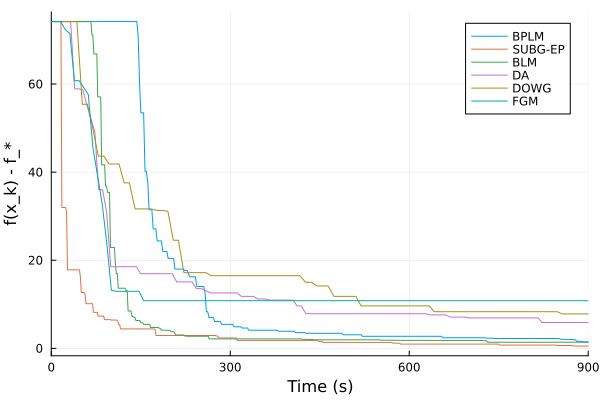

In [58]:
idx = 13
FS = maximum(load_object("..//results//optimal_values//NewRefinedOptRunCA$(idx).jld2")[3])
XBLM, ITBLM, BLM, TBLM = load_object("..//results//15min_runs//BundleLevelMethodCA$(idx).jld2")
XBPLM, ITBPLM, BPLM, TBPLM = load_object("..//results//15min_runs//BundleProximalLevelMethod-L-CA$(idx).jld2")
XPOL, ITPOL, POL, TPOL = load_object("..//results//15min_runs//PolyakMethodCA$(idx).jld2")
XSGEP, ITSGEP, SGEP, TSGEP = load_object("..//results//15min_runs//SubG-EP-CA$(idx).jld2")
XDWG, ITDWG, DWG, TDWG = load_object("..//results//15min_runs//DowGCA$(idx).jld2")
XDA, ITDA, DA, TDA = load_object("..//results//15min_runs//D-AdaptationCA$(idx).jld2")
XFGM, ITFGM, FGM, TFGM = load_object("..//results//15min_runs//FGMCA$(idx).jld2")

plot(TBPLM[2:end], mon(FS .- (BPLM)), label="BPLM", xlims = (0, 900))
plot!(TSGEP[2:end], mon(FS .- (SGEP)), label="SUBG-EP")
plot!(TBLM[2:end], mon(FS .- (BLM)), label="BLM")
plot!(TDA[2:end], mon(FS .- (DA)), label="DA")
plot!(TDWG[2:end], mon(FS .- (DWG)), label="DOWG")
plot!(TFGM[1:end], mon(FS .- (FGM)), label="FGM")
plot!(xlabel = "Time (s)", ylabel = "f(x_k) - f_*")

In [ ]:
plot(LinRange(0, 24, 96), ITBPLM[argmax(BPLM)+1], label="CH price - BPLM")
plot!(LinRange(0, 24, 96), ITSGEP[argmax(SGEP)+1], label="CH price - SG-EP")
plot!(LinRange(0, 24, 96), ITBLM[argmax(BLM)+1], label="CH price - BLM")

#plot!(LinRange(0, 24, 96), ITDWG[argmax(DWG)+1], label="CH price - DOWG")
#plot!(LinRange(0, 24, 96), ITDA[argmax(DA)+1], label="CH price - DA")


In [ ]:
for idx = 1:20
  FS = maximum(load_object("..//results//optimal_values//NewOptRunCA$(idx).jld2")[3])
  _, _, Polyak, TPolyak = load_object("..//results//15min_runs//PolyakMethodCA$(idx).jld2")
  _, _, DA, TDA = load_object("..//results//15min_runs//D-AdaptationCA$(idx).jld2")
  _, _, BLM, TBLM = load_object("..//results//15min_runs//BundleLevelMethodCA$(idx).jld2")
  _, _, DWG, TDWG = load_object("..//results//15min_runs//DowGCA$(idx).jld2")
  _, _, SG, TSG = load_object("..//results//15min_runs//SubGCA$(idx).jld2")
  _, _, SGEP, TSGEP = load_object("..//results//15min_runs//SubG-EP-CA$(idx).jld2")

  choice = argmin([FS - maximum(DA), FS - maximum(BLM), FS - maximum(DWG), FS - maximum(SG), FS - maximum(SGEP)])
  listMethod = ["DA", "BLM", "DWG", "SG", "SG-EP"]
  @info "idx = $idx ; winner = $(listMethod[choice])"
  @show length(DA)
  @show length(BLM)
  @show length(Polyak)
  @show length(DWG)
  @show length(SG)
  @show length(SGEP)
  #= plot(TPolyak, mon(FS .- (Polyak)), label = "Polyak")
  plot(TDA[2:end], mon(FS .- (DA)), label="DA")
  plot!(TBLM[2:end], mon(FS .- (BLM)), label="BLM")
  plot!(TDWG[2:end], mon(FS .- (DWG)), label="DWG")
  plot!(TSG[2:end], mon(FS .- (SG)), label="SG") =#
end

In [ ]:
idx = 1 # BE: 2, 3, 7 ça va pas, 8 // CA: 9, 10, 11, 12 : initialization at X*. 
XstarP, IteratesP, FunIteratesP, TimeVectorP = load_object("..//results//15min_runs//PolyakMethodBE$(idx).jld2")
XstarDA, IteratesDA, FunIteratesDA, TimeVectorDA = load_object("..//results//15min_runs//D-AdaptationBE$(idx).jld2")
_, _, fs, tv = load_object("..//results//optimal_values//NewOptRunBE$(idx).jld2")
Xstar, Iterates, FunIterates, TimeVector = load_object("..//results//15min_runs//SubGBE$(idx).jld2")
XstarDWG, IteratesDWG, FunIteratesDWG, TimeVectorDWG = load_object("..//results//15min_runs//DowGBE$(idx).jld2")
@show maximum(fs) - maximum(FunIteratesP)
@show maximum(fs) - maximum(FunIteratesDA)
@show maximum(fs) - maximum(FunIterates)
@show maximum(fs) - maximum(FunIteratesDWG)

plot(TimeVectorP, mon(maximum(fs) .- FunIteratesP), label="Polyak", xlims=(0, 900))
plot!(TimeVector[2:end], mon(maximum(fs) .- FunIterates), label="SUBG")
plot!(tv[2:end], mon(maximum(fs) .- fs), label="long BLM")
plot!(TimeVectorDA[2:end], mon(maximum(fs) .- FunIteratesDA), label="D-Adaptation")
plot!(TimeVectorDWG[2:end], mon(maximum(fs) .- FunIteratesDWG), label="DowG")

In [ ]:
Xstar1, Iterates1, FunIterates1, TimeVector1 = load_object("..//results//optimal_values//NewOptRunBE1.jld2")
Xstar2, Iterates2, FunIterates2, TimeVector2 = load_object("..//results//optimal_values//NewOptRunBE2.jld2")
Xstar3, Iterates3, FunIterates3, TimeVector3 = load_object("..//results//optimal_values//NewOptRunBE3.jld2")
Xstar4, Iterates4, FunIterates4, TimeVector4 = load_object("..//results//optimal_values//NewOptRunBE4.jld2")
Xstar5, Iterates5, FunIterates5, TimeVector5 = load_object("..//results//optimal_values//NewOptRunBE5.jld2")
Xstar6, Iterates6, FunIterates6, TimeVector6 = load_object("..//results//optimal_values//NewOptRunBE6.jld2")
Xstar7, Iterates7, FunIterates7, TimeVector7 = load_object("..//results//optimal_values//NewOptRunBE7.jld2")
Xstar8, Iterates8, FunIterates8, TimeVector8 = load_object("..//results//optimal_values//NewOptRunBE8.jld2")
XstarP1, IteratesP1, FunIteratesP1, TimeVectorP1 = load_object("..//results//15min_runs//PolyakMethodBE1.jld2")
XstarP2, IteratesP2, FunIteratesP2, TimeVectorP2 = load_object("..//results//15min_runs//PolyakMethodBE2.jld2")
XstarP3, IteratesP3, FunIteratesP3, TimeVectorP3 = load_object("..//results//15min_runs//PolyakMethodBE3.jld2")
XstarP4, IteratesP4, FunIteratesP4, TimeVectorP4 = load_object("..//results//15min_runs//PolyakMethodBE4.jld2")

In [ ]:
plot(LinRange(0, 24, 96), Iterates1[argmax(FunIterates1)+1], xlabel="Hour of the day", ylabel="Price (€)", xlims=(0, 24), label="CH price - BE Autumn Week Day", xticks=0:1:24)
plot!(LinRange(0, 24, 96), Iterates2[argmax(FunIterates2)+1], label="CH price - BE Autumn Week-End")
plot!(LinRange(0, 24, 96), Iterates3[argmax(FunIterates3)+1], label="CH price - BE Spring Week Day")
plot!(LinRange(0, 24, 96), Iterates4[argmax(FunIterates4)+1], label="CH price - BE Spring Week-End")
plot!(LinRange(0, 24, 96), Iterates5[argmax(FunIterates5)+1], label="CH price - BE Summer Week Day")
plot!(LinRange(0, 24, 96), Iterates6[argmax(FunIterates6)+1], label="CH price - BE Summer Week-End")
plot!(LinRange(0, 24, 96), Iterates7[argmax(FunIterates7)+1], label="CH price - BE Winter Week Day")
plot!(LinRange(0, 24, 96), Iterates8[argmax(FunIterates8)+1], label="CH price - BE Winter Week-End")